In [188]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import os
import numpy as np
import datetime as dt
%config IPCompleter.greedy=True

In [33]:
print(os.getcwd())

/Users/montealvo/Documents/SB_DataScience/Capstone/Mass_Mobilization


### Table of Contents

   * [Data Loading](#data_load)
   * [Exploration](#first_insp)
   * [Categorical plots](#cat_insp)
   * [Correlation matrix](#corr)
   * [Stacked graph for State responses](#stack)

#### Data loading <a class="anchor" id="data_load"></a>

In [34]:
df = pd.read_csv('../Mass_Mobilization/df.csv')

In [35]:
df.head()

id country  ccode  year         region  protest  protestnumber  \
0  201990001  Canada     20  1990  North America        1              1   
1  201990002  Canada     20  1990  North America        1              2   
2  201990003  Canada     20  1990  North America        1              3   
3  201990004  Canada     20  1990  North America        1              4   
4  201990005  Canada     20  1990  North America        1              5   

   startday  startmonth  startyear  ...  protesterdemand2_y  \
0      15.0         1.0     1990.0  ...  labor wage dispute   
1      25.0         6.0     1990.0  ...                 NaN   
2       1.0         7.0     1990.0  ...                 NaN   
3      12.0         7.0     1990.0  ...                 NaN   
4      14.0         8.0     1990.0  ...                 NaN   

   protesterdemand3_y  protesterdemand4_y  stateresponse1_y stateresponse2_y  \
0                 NaN                 NaN            ignore              NaN   
1                 NaN                 NaN            ignore              NaN   
2                 NaN                 NaN            ignore              NaN   
3                 NaN                 NaN      accomodation              NaN   
4                 NaN                 NaN   crowd dispersal          arrests   

  stateresponse3_y stateresponse4_y stateresponse5_y  stateresponse6_y  \
0              NaN              NaN              NaN               NaN   
1              NaN              NaN              NaN               NaN   
2              NaN              NaN              NaN               NaN   
3              NaN              NaN              NaN               NaN   
4     accomodation              NaN              NaN               NaN   

  stateresponse7_y  
0              NaN  
1              NaN  
2              NaN  
3              NaN  
4              NaN  

[5 rows x 53 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          14482 non-null  int64  
 1   country                     14482 non-null  object 
 2   ccode                       14482 non-null  int64  
 3   year                        14482 non-null  int64  
 4   region                      14482 non-null  object 
 5   protest                     14482 non-null  int64  
 6   protestnumber               14482 non-null  int64  
 7   startday                    14482 non-null  float64
 8   startmonth                  14482 non-null  float64
 9   startyear                   14482 non-null  float64
 10  endday                      14482 non-null  float64
 11  endmonth                    14482 non-null  float64
 12  endyear                     14482 non-null  float64
 13  protesterviolence           144

In [120]:
df_cat_dict = {
"region" : 'category',
"startmonth" : 'category',
"endmonth" : 'category',
"new_participants_category" : 'category',
"labor_wage_dispute" : 'bool',
"land_farm_issue" : 'bool',
"police_brutality" : 'bool',
"political_behavior" : 'bool',
"price_increases_tax_policy" : 'bool',
"removal_of_politician" : 'bool',
"social_restrictions" : 'bool',
"accomodation" : 'bool',
"arrests" : 'bool',
"beatings" : 'bool',
"crowd_dispersal" : 'bool',
"ignore" : 'bool',
"killings" : 'bool',
"shootings" : 'bool',
"first_response" : 'category',
"last_response" : 'category',
"protesterdemand1_y" : 'category',
"protesterdemand2_y" : 'category',
"protesterdemand3_y" : 'category',
"protesterdemand4_y" : 'category',
"stateresponse1_y" : 'category',
"stateresponse2_y" : 'category',
"stateresponse3_y" : 'category',
"stateresponse4_y" : 'category',
"stateresponse5_y" : 'category',
"stateresponse6_y" : 'category',
"stateresponse7_y" : 'category',
"year" : 'int',
"startday" : 'int',
"startyear" : 'int',
"endday" : 'int',
"endyear" : 'int',
"protesterviolence" : 'int',
"start_date": 'datetime64[ns]',
"end_date": 'datetime64[ns]'
}

In [121]:
df = df.astype(df_cat_dict)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          14482 non-null  int64         
 1   country                     14482 non-null  object        
 2   ccode                       14482 non-null  int64         
 3   year                        14482 non-null  int64         
 4   region                      14482 non-null  category      
 5   protest                     14482 non-null  int64         
 6   protestnumber               14482 non-null  int64         
 7   startday                    14482 non-null  int64         
 8   startmonth                  14482 non-null  category      
 9   startyear                   14482 non-null  int64         
 10  endday                      14482 non-null  int64         
 11  endmonth                    14482 non-null  category  

In [125]:
df.nunique()

id                            14482
country                         166
ccode                           168
year                             30
region                            8
protest                           1
protestnumber                   143
startday                         31
startmonth                       12
startyear                        30
endday                           31
endmonth                         12
endyear                          30
protesterviolence                 2
location                       4258
protesteridentity              5529
sources                       13540
notes                         13322
participants_int                304
new_participants_category         7
demand_combo                    135
labor_wage_dispute                2
land_farm_issue                   2
police_brutality                  2
political_behavior                2
price_increases_tax_policy        2
removal_of_politician             2
social_restrictions         

In [308]:
df2 = df[['country','region','year','startmonth','participants_int','new_participants_category', 'labor_wage_dispute','land_farm_issue','police_brutality','political_behavior','price_increases_tax_policy','removal_of_politician','social_restrictions','protesterdemand1_y','protesterdemand2_y','protesterdemand3_y','protesterdemand4_y','stateresponse1_y', 'stateresponse2_y', 'stateresponse3_y','stateresponse4_y','stateresponse5_y','stateresponse6_y','stateresponse7_y','accomodation','arrests','beatings','crowd_dispersal','ignore','killings','shootings','first_response','last_response','start_date','end_date']]

In [310]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14482 entries, 0 to 14481
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   country                     14482 non-null  object        
 1   region                      14482 non-null  category      
 2   year                        14482 non-null  int64         
 3   startmonth                  14482 non-null  category      
 4   participants_int            14465 non-null  float64       
 5   new_participants_category   14465 non-null  category      
 6   labor_wage_dispute          14482 non-null  bool          
 7   land_farm_issue             14482 non-null  bool          
 8   police_brutality            14482 non-null  bool          
 9   political_behavior          14482 non-null  bool          
 10  price_increases_tax_policy  14482 non-null  bool          
 11  removal_of_politician       14482 non-null  bool      

In [209]:
dem_total = df.demands_count.sum()
dem_columns = ["labor_wage_dispute","land_farm_issue","police_brutality","political_behavior","price_increases_tax_policy","removal_of_politician","social_restrictions"]
dem_feature = []
dem_pct_col = []

for col in dem_columns:
    dem_feature.append(col)
    dem_pct_col.append(round((df[col].sum()/dem_total)*100,2))
    print (col)
    

labor_wage_dispute
land_farm_issue
police_brutality
political_behavior
price_increases_tax_policy
removal_of_politician
social_restrictions


In [210]:
dem_feat_pct = zip(dem_feature,dem_pct_col)

In [211]:
dem_pct = pd.DataFrame(dem_feat_pct, columns=['dem_feature','dem_pct'])
dem_pct

dem_feature  dem_pct
0          labor_wage_dispute    12.23
1             land_farm_issue     3.22
2            police_brutality     5.70
3          political_behavior    58.23
4  price_increases_tax_policy     7.83
5       removal_of_politician     9.21
6         social_restrictions     3.58

In [203]:
(df.labor_wage_dispute.sum()/dem_total)*100

12.225400457665904

In [228]:
resp_total = df.responses_count.sum()
resp_total

18301

In [234]:
resp_total = df.demands_count.sum()
resp_columns = ["accomodation","arrests","beatings","crowd_dispersal","ignore","killings","shootings"]
resp_feature = []
resp_pct_col = []

for col in resp_columns:
    resp_feature.append(col)
    resp_pct_col.append(round((df[col].sum()/resp_total)*100,2))
    print (col)

accomodation
arrests
beatings
crowd_dispersal
ignore
killings
shootings


In [238]:
resp_pct_col

[8.54, 11.54, 4.42, 25.22, 45.62, 4.39, 4.97]

In [235]:
resp_feat_pct = zip(resp_feature,resp_pct_col)

In [239]:
resp_pct = pd.DataFrame(resp_feat_pct, columns=['resp_feature','resp_pct'])
resp_pct

resp_feature  resp_pct
0     accomodation      8.54
1          arrests     11.54
2         beatings      4.42
3  crowd_dispersal     25.22
4           ignore     45.62
5         killings      4.39
6        shootings      4.97

#### Exploration <a class="anchor" id="first_insp"></a>

## Protest count by country (Top 20)

In [168]:
df.groupby("country").protest.count().nlargest(n=20)

country
United Kingdom    547
France            526
Ireland           428
Germany           360
Kenya             348
South Korea       340
Bangladesh        336
Venezuela         314
Greece            308
China             263
Thailand          246
Namibia           225
Brazil            220
Romania           215
Nepal             206
India             203
Russia            192
Pakistan          172
South Africa      171
Italy             163
Name: protest, dtype: int64

Text(0, 0.5, 'Number of Protests')

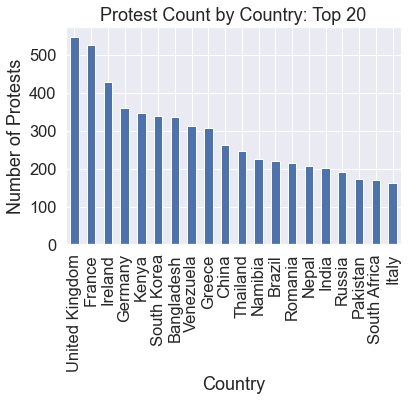

In [181]:
protest_count = df.groupby("country").protest.count().nlargest(n=20).plot(kind='bar', title='Protest Count by Country: Top 20')
protest_count.set_xlabel("Country")
protest_count.set_ylabel("Number of Protests")

## Protest by Region

<AxesSubplot:>

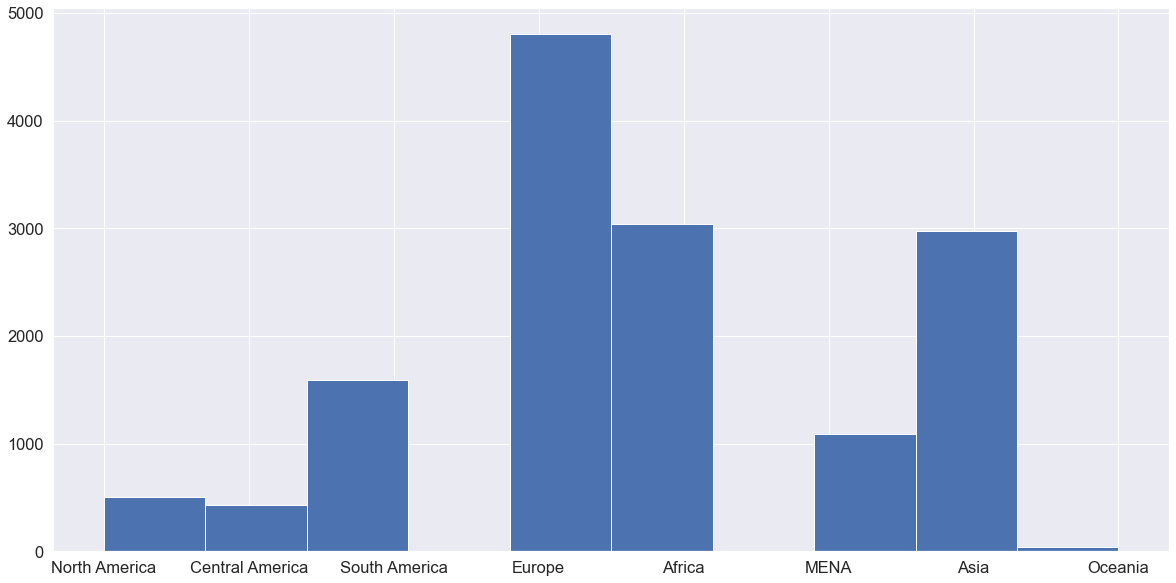

In [269]:
df.region.hist(figsize = (20,10))
#plt.title = 'Number of Protests by Region'

## Protest Count by Year

In [176]:
df.groupby("year").protest.count()

year
1990    569
1991    371
1992    409
1993    328
1994    389
1995    353
1996    408
1997    487
1998    442
1999    410
2000    487
2001    392
2002    415
2003    386
2004    438
2005    497
2006    454
2007    444
2008    396
2009    376
2010    452
2011    684
2012    551
2013    584
2014    769
2015    857
2016    713
2017    540
2018    698
2019    183
Name: protest, dtype: int64

Text(0, 0.5, 'Number of Protests')

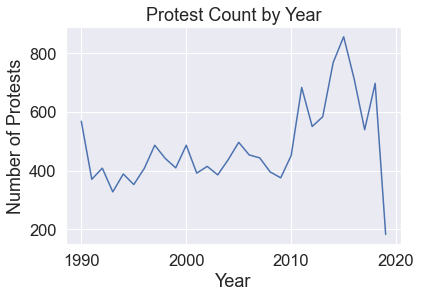

In [177]:
protest_by_year = df.groupby("year").protest.count().plot(kind='line',  title='Protest Count by Year')
protest_by_year.set_xlabel("Year")
protest_by_year.set_ylabel("Number of Protests")

array([[<AxesSubplot:title={'center':'year'}>]], dtype=object)

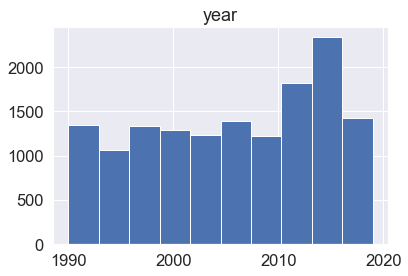

In [262]:
df.hist(column='year')

## Start Month Distribution

In [182]:
df.groupby("startmonth").protest.count()

startmonth
1.0     1311
2.0     1341
3.0     1530
4.0     1265
5.0     1458
6.0     1089
7.0     1087
8.0      982
9.0     1096
10.0    1140
11.0    1189
12.0     994
Name: protest, dtype: int64

Text(0, 0.5, 'Number of Protests')

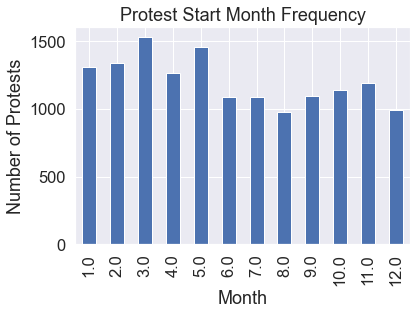

In [257]:
start_month = df.groupby("startmonth").protest.count().plot(kind='bar', title='Protest Start Month Frequency')
start_month.set_xlabel("Month")
start_month.set_ylabel("Number of Protests")
#ylabels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')

## Protest duration

In [217]:
duration = df.end_date - df.start_date

In [219]:
df.start_date

0       1990-01-15
1       1990-06-25
2       1990-07-01
3       1990-07-12
4       1990-08-14
           ...    
14477   2014-02-16
14478   2016-05-15
14479   2017-06-15
14480   2017-07-15
14481   2017-10-31
Name: start_date, Length: 14482, dtype: datetime64[ns]

In [220]:
df.end_date

0       1990-01-15
1       1990-06-25
2       1990-07-01
3       1990-09-06
4       1990-08-15
           ...    
14477   2014-02-18
14478   2016-06-09
14479   2017-06-15
14480   2017-07-15
14481   2017-10-31
Name: end_date, Length: 14482, dtype: datetime64[ns]

In [420]:
df['dur_column'] = duration.dt.days + 1

In [421]:
df.dur_column

0         1
1         1
2         1
3        57
4         2
         ..
14477     3
14478    26
14479     1
14480     1
14481     1
Name: dur_column, Length: 14482, dtype: int64

Text(0, 0.5, 'Number of Protests')

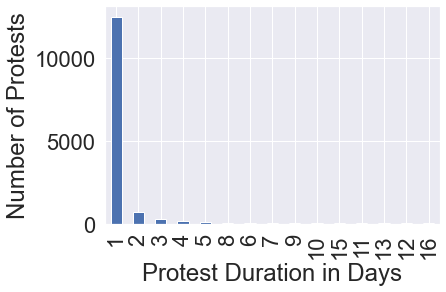

In [422]:
protest_duration = df.groupby("dur_column").protest.count().nlargest(n=15).plot(kind= "bar")
protest_duration.set_xlabel("Protest Duration in Days")
protest_duration.set_ylabel("Number of Protests")

## Participant Category Protest Frequency

In [189]:
df.groupby("new_participants_category").protest.count()

new_participants_category
0-50          1128
100-999       4659
1000-1999     1591
2000-4999     1923
50-99         2091
5000-10000    1625
>10000        1448
Name: protest, dtype: int64

Text(0, 0.5, 'Number of Protests')

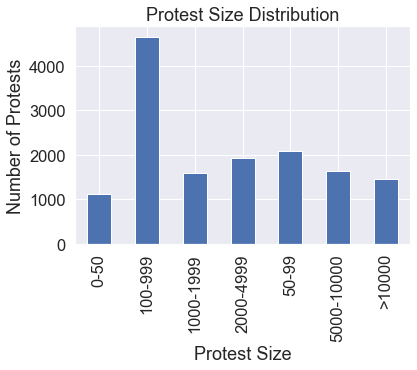

In [190]:
protest_size = df.groupby("new_participants_category").protest.count().plot(kind='bar', title='Protest Size Distribution')
protest_size.set_xlabel("Protest Size")
protest_size.set_ylabel("Number of Protests")

## Demand Breakdown

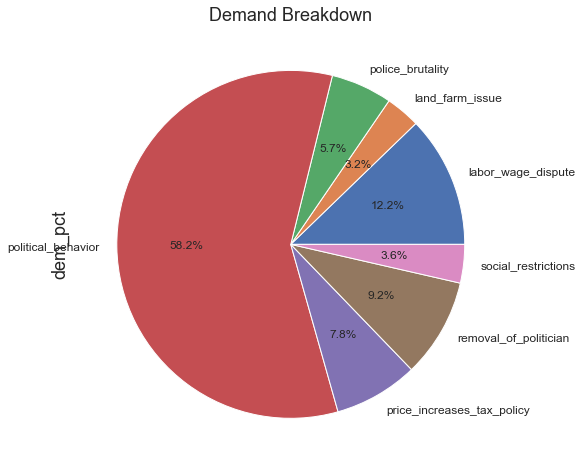

In [227]:
dem_pct.dem_pct.plot(kind='pie', labels= ["labor_wage_dispute","land_farm_issue","police_brutality","political_behavior","price_increases_tax_policy","removal_of_politician","social_restrictions"],figsize=(12,8),fontsize=12,autopct='%1.1f%%' )
plt.title('Demand Breakdown')
#plt.legend()
plt.show()
#put in desc order, sort df

## Responses Breakdown

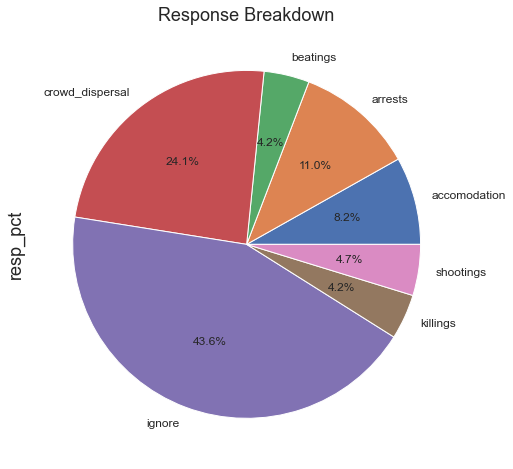

In [240]:
resp_pct.resp_pct.plot(kind='pie', labels=["accomodation","arrests","beatings","crowd_dispersal","ignore","killings","shootings"] ,figsize=(12,8),fontsize=12,autopct='%1.1f%%' )
plt.title('Response Breakdown')
#plt.legend()
plt.show()

## Univariate Chart of target

In [294]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

L= len(df)

resp_bar = go.Figure(data=[go.Bar(x=['accomodation','arrests','beatings','crowd_dispersal','ignore','killings','shootings'], 
                              y =[df['accomodation'].sum(),
                                  df['arrests'].sum(),
                                  df['beatings'].sum(), 
                                  df['crowd_dispersal'].sum(),
                                  df['ignore'].sum(),
                                  df['killings'].sum(),
                                  df['shootings'].sum()], 
                                  name='True'),
                       go.Bar(x=['accomodation','arrests','beatings','crowd_dispersal','ignore','killings','shootings'], 
                              y =[L-df['accomodation'].sum(),
                                  L-df['arrests'].sum(),
                                  L-df['beatings'].sum(),
                                  L-df['crowd_dispersal'].sum(),
                                  L-df['ignore'].sum(),
                                  L-df['killings'].sum(), 
                                  L-df['shootings'].sum()], 
                                  name='False')])
resp_bar.update_layout(barmode='stack',   bargap=0.05, width=500, height=400, title = "Target Distribution")


In [362]:
import plotly.express as px
fig1 = px.scatter_matrix(df2,
                        dimensions=['year','first_response'],
                        color='region',title="Scatter matrix of State Response across time",labels= df2.columns)
fig1.show()



In [360]:
fig2 = px.scatter_matrix(df2,
                        dimensions=['year','stateresponse2_y'],
                        color="region", title="Scatter matrix of State Response 2 across time",labels= df2.columns)
fig2.show()

In [363]:
fig3 = px.scatter_matrix(df2,
                        dimensions=['year','last_response'],
                        color='region',title="Scatter matrix of Last State Response across time",labels= df2.columns)
fig3.show()



In [377]:
fig4 = px.scatter_matrix(df2,
                        dimensions=['country','stateresponse1_y'],
                        color="region", title="Scatter matrix of country and target",labels= df2.columns)
fig4.show()

In [376]:
fig5 = px.scatter_matrix(df2,
                        dimensions=['startmonth','last_response'],
                         color = 'region'
                        ,title="Scatter matrix start month vs response",opacity = 0.5)
fig5.show()

In [378]:
fig6 = px.scatter_matrix(df2,
                        dimensions=['participants_int','last_response'],
                         color = 'region'
                        ,title="Scatter matrix number of participants vs response",opacity = 0.5)
fig6.show()
#box plot, for each response, avg number of participants for response. Groupviolent or not

In [379]:
fig7 = px.scatter_matrix(df2,
                        dimensions=['new_participants_category','last_response'],
                         color = 'region'
                        ,title="Scatter matrix number of participants (category) vs response",opacity = 0.5)
fig7.show()

In [387]:
lwd = df2[df2['labor_wage_dispute']==1]

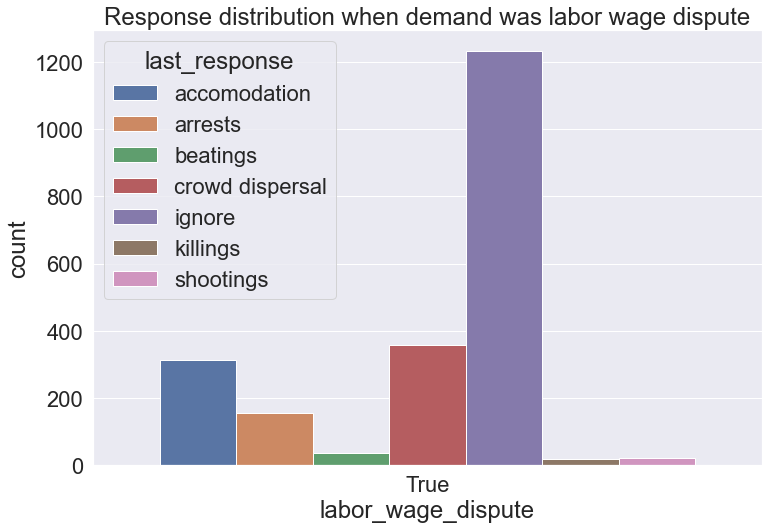

In [395]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= lwd, x='labor_wage_dispute', hue='last_response')
plt.title('Response distribution when protest demand was labor wage')
plt.show()

In [396]:
lfi = df2[df2['land_farm_issue']==1]

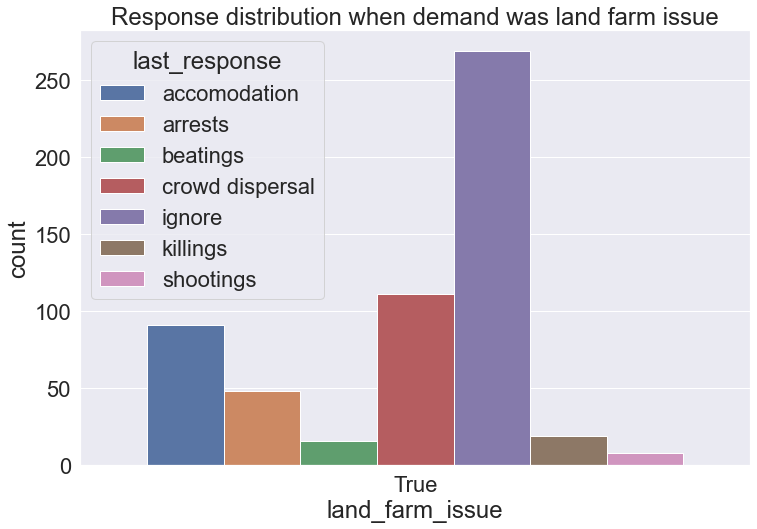

In [397]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= lfi, x='land_farm_issue', hue='last_response')
plt.title('Response distribution when protest demand was land farm issue')
plt.show()

In [398]:
polb = df2[df2['police_brutality']==1]

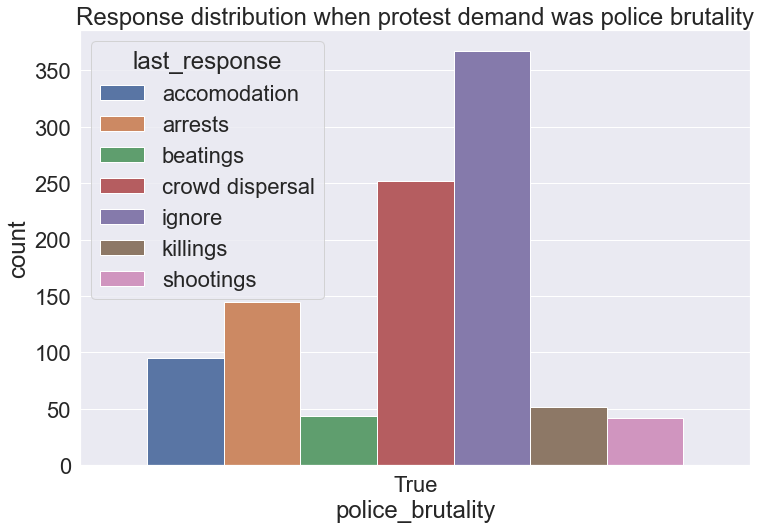

In [399]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= polb, x='police_brutality', hue='last_response')
plt.title('Response distribution when protest demand was police brutality')
plt.show()

In [400]:
polbeh = df2[df2['political_behavior']==1]

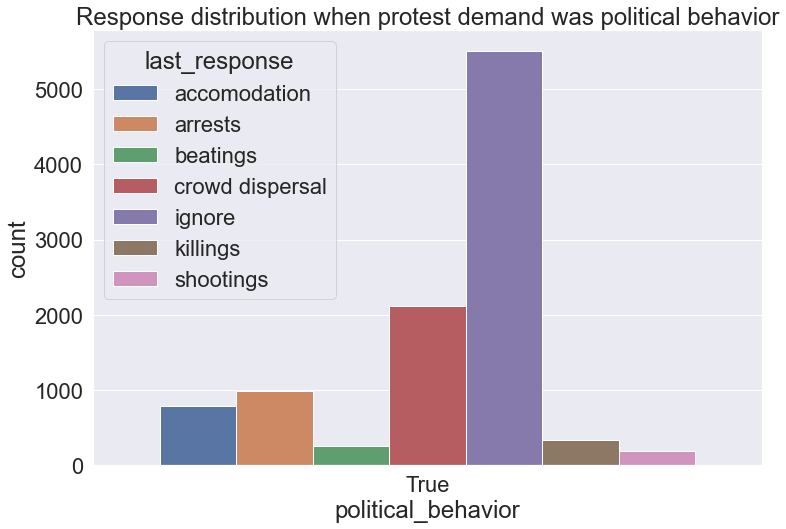

In [401]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= polbeh, x='political_behavior', hue='last_response')
plt.title('Response distribution when protest demand was political behavior')
plt.show()

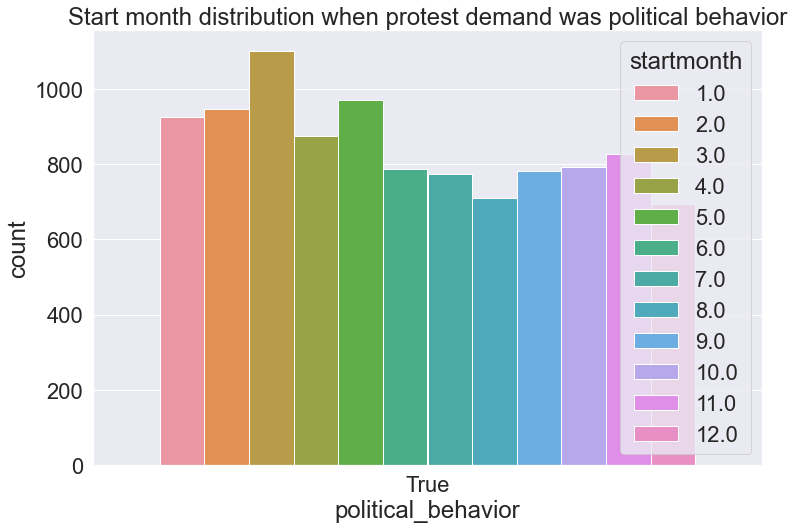

In [403]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= polbeh, x='political_behavior', hue='startmonth')
plt.title('Start month distribution when protest demand was political behavior')
plt.show()

In [405]:
pitp = df2[df2['price_increases_tax_policy']==1]

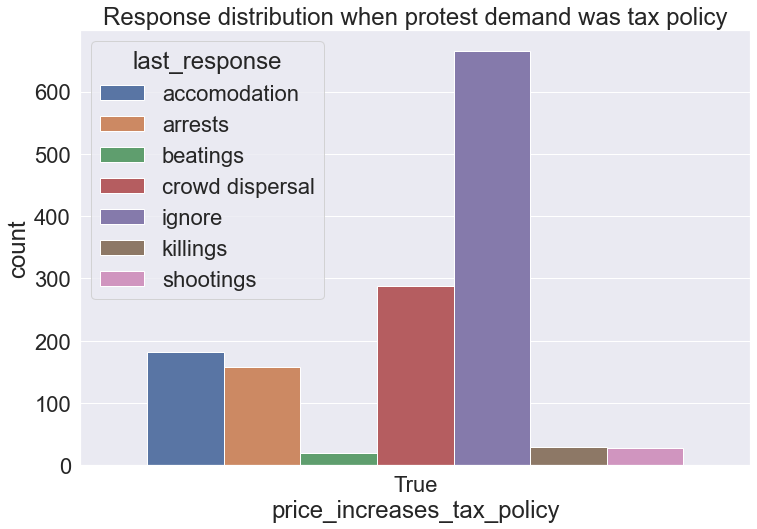

In [406]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= pitp, x='price_increases_tax_policy', hue='last_response')
plt.title('Response distribution when protest demand was tax policy')
plt.show()

In [407]:
rop = df2[df2['removal_of_politician']==1]

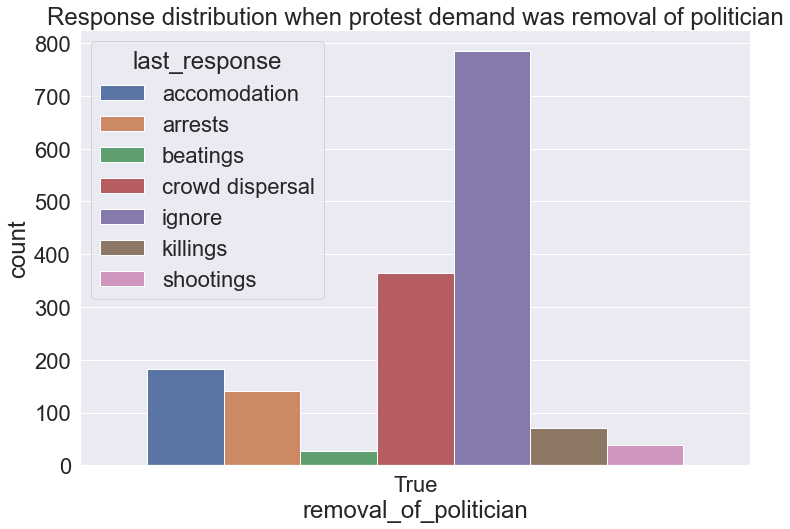

In [408]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= rop, x='removal_of_politician', hue='last_response')
plt.title('Response distribution when protest demand was removal of politician')
plt.show()

In [409]:
sr = df2[df2['social_restrictions']==1]

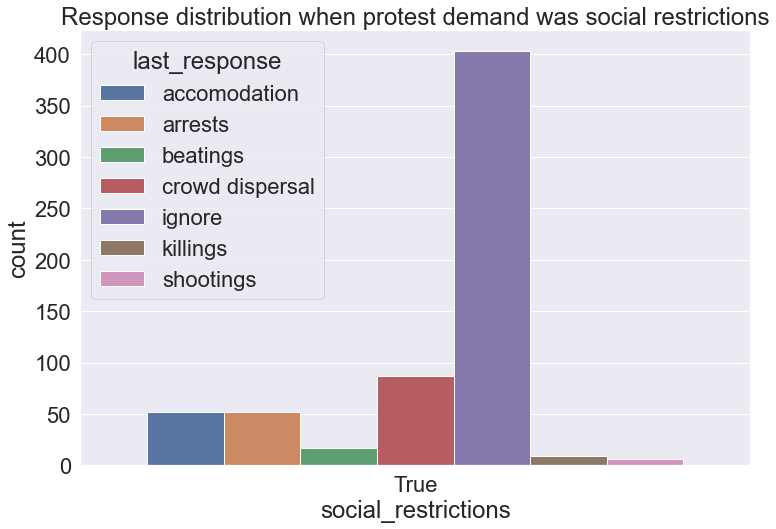

In [410]:
plt.figure(figsize=(12,8))
sns.set(font_scale=2)
sns.countplot(data= sr, x='social_restrictions', hue='last_response')
plt.title('Response distribution when protest demand was social restrictions')
plt.show()

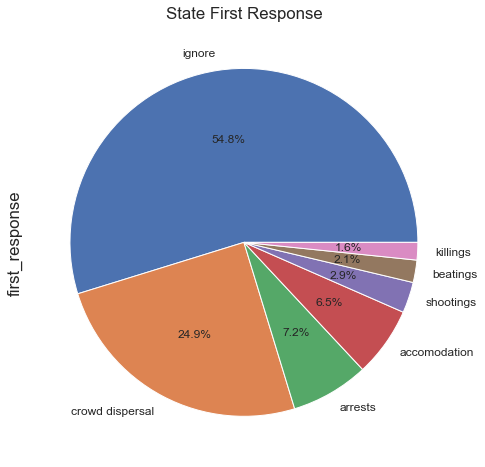

In [79]:
df.first_response.value_counts().plot(kind='pie',figsize=(12,8),fontsize=12,autopct='%1.1f%%' )
plt.title('State First Response')
plt.show()

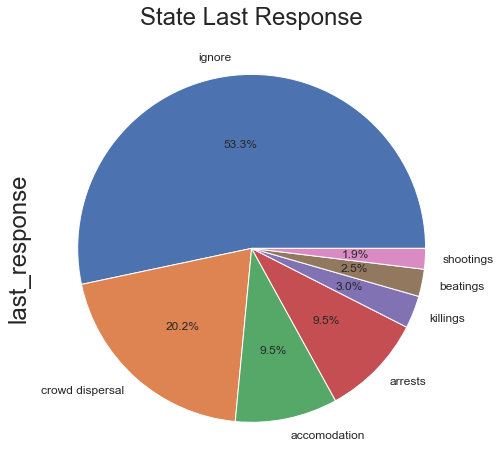

In [423]:
df.last_response.value_counts().plot(kind='pie',figsize=(12,8),fontsize=12,autopct='%1.1f%%' )
plt.title('State Last Response')
plt.show()

#### Correlation matrix <a class="anchor" id="corr"></a>

In [311]:
df2.corr()

year  participants_int  labor_wage_dispute  \
year                        1.000000         -0.017962           -0.034107   
participants_int           -0.017962          1.000000            0.047243   
labor_wage_dispute         -0.034107          0.047243            1.000000   
land_farm_issue             0.079085         -0.021448           -0.069487   
police_brutality            0.033215         -0.018896           -0.100058   
political_behavior          0.018088          0.014228           -0.351919   
price_increases_tax_policy -0.025942          0.002686            0.011304   
removal_of_politician       0.088623          0.008034           -0.096358   
social_restrictions         0.061901         -0.000651           -0.074075   
accomodation               -0.002478          0.010696            0.075470   
arrests                    -0.004371         -0.016736           -0.041968   
beatings                   -0.071515         -0.017924           -0.035463   
crowd_dispersal             0.020217         -0.019186           -0.032833   
ignore                      0.014459          0.032021            0.038040   
killings                   -0.017029          0.004255           -0.059363   
shootings                  -0.008989         -0.000458           -0.044361   

                            land_farm_issue  police_brutality  \
year                               0.079085          0.033215   
participants_int                  -0.021448         -0.018896   
labor_wage_dispute                -0.069487         -0.100058   
land_farm_issue                    1.000000         -0.032041   
police_brutality                  -0.032041          1.000000   
political_behavior                -0.165870         -0.232605   
price_increases_tax_policy        -0.046592         -0.061755   
removal_of_politician             -0.055139         -0.054519   
social_restrictions               -0.028644         -0.033656   
accomodation                       0.048339          0.005638   
arrests                            0.001783          0.047373   
beatings                          -0.006301          0.047168   
crowd_dispersal                    0.006139          0.070210   
ignore                            -0.019755         -0.093224   
killings                          -0.001282          0.046402   
shootings                         -0.007056          0.065770   

                            political_behavior  price_increases_tax_policy  \
year                                  0.018088                   -0.025942   
participants_int                      0.014228                    0.002686   
labor_wage_dispute                   -0.351919                    0.011304   
land_farm_issue                      -0.165870                   -0.046592   
police_brutality                     -0.232605                   -0.061755   
political_behavior                    1.000000                   -0.254219   
price_increases_tax_policy           -0.254219                    1.000000   
removal_of_politician                -0.132967                   -0.056459   
social_restrictions                  -0.134480                   -0.055912   
accomodation                         -0.091301                    0.041894   
arrests                               0.014099                    0.039763   
beatings                              0.012364                   -0.033597   
crowd_dispersal                       0.037115                    0.029344   
ignore                                0.023266                   -0.027466   
killings                              0.019684                   -0.000632   
shootings                            -0.002606                    0.007902   

                            removal_of_politician  social_restrictions  \
year                                     0.088623             0.061901   
participants_int                         0.008034            -0.000651   
labor_wage_dispute                      -0.096358 

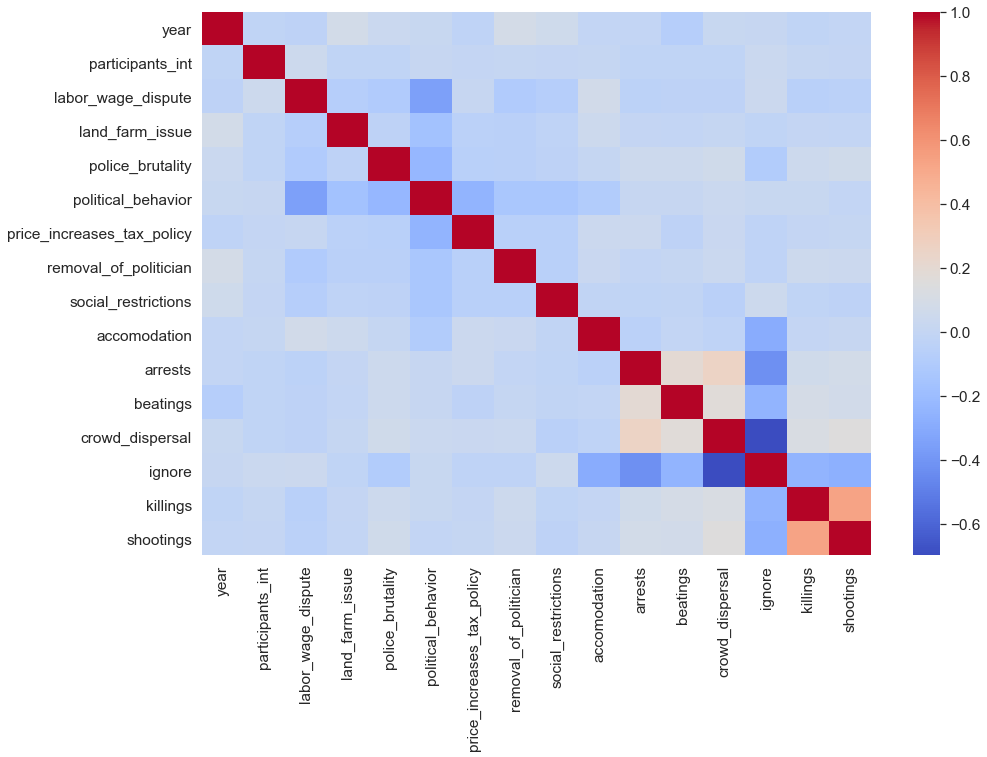

In [323]:
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)
sns.heatmap(df2.corr(), annot= False, cmap = "coolwarm")
plt.show()

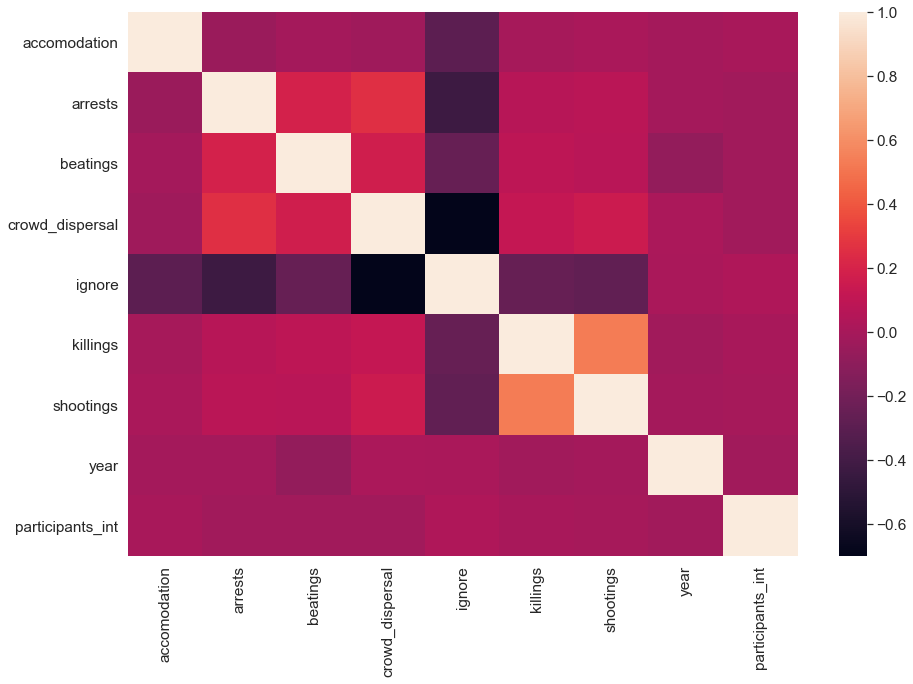

In [328]:
corrMatrix_2 = df2[['accomodation','arrests','beatings','crowd_dispersal','ignore','killings','shootings','country', 'year', 'region','startmonth','participants_int','new_participants_category','start_date','end_date']].corr()
plt.figure(figsize=(15,10))
sns.set(font_scale=1.4)
sns.heatmap(corrMatrix_2, annot= False)
plt.show()

#### Stacked graph for State response <a class="anchor" id="stack"></a>

In [42]:
# Data
r = [0,1,2,3,4,5,6]

In [43]:
responsecols = ['stateresponse1_y', 'stateresponse2_y', 'stateresponse3_y', 'stateresponse4_y',
       'stateresponse5_y', 'stateresponse6_y', 'stateresponse7_y']

In [45]:
sr_list = [df[responsenum].value_counts().to_dict() for responsenum in responsecols]

In [46]:
sr_list

[{'ignore': 7933,
  'crowd dispersal': 3610,
  'arrests': 1049,
  'accomodation': 937,
  'shootings': 415,
  'beatings': 300,
  'killings': 236},
 {'arrests': 692,
  'crowd dispersal': 568,
  'accomodation': 382,
  'beatings': 369,
  'shootings': 359,
  'killings': 311,
  'ignore': 33},
 {'arrests': 212,
  'crowd dispersal': 207,
  'killings': 175,
  'accomodation': 92,
  'beatings': 80,
  'shootings': 72,
  'ignore': 10},
 {'accomodation': 64,
  'arrests': 50,
  'crowd dispersal': 40,
  'killings': 38,
  'beatings': 19,
  'shootings': 19},
 {'accomodation': 16,
  'arrests': 14,
  'crowd dispersal': 9,
  'killings': 7,
  'beatings': 3,
  'shootings': 3},
 {'accomodation': 9,
  'crowd dispersal': 3,
  'killings': 2,
  'beatings': 1,
  'arrests': 1},
 {'accomodation': 3, 'arrests': 2, 'beatings': 1, 'killings': 1}]

In [47]:
sr_list[0]

{'ignore': 7933,
 'crowd dispersal': 3610,
 'arrests': 1049,
 'accomodation': 937,
 'shootings': 415,
 'beatings': 300,
 'killings': 236}

In [48]:
unique_responses = sr_list[0].keys()

totals = {}

for response in unique_responses:
    totals[response] = 0

    for dic in sr_list:
        if response in dic:

            totals[response] += dic[response]

In [49]:
totals

{'ignore': 7976,
 'crowd dispersal': 4437,
 'arrests': 2020,
 'accomodation': 1503,
 'shootings': 868,
 'beatings': 773,
 'killings': 770}

In [50]:
np.sum(list(sr_list[0].values()))

14480

In [51]:
response_bars = []
response_bars_dict = []
response_types = sr_list[0].keys()

for response in sr_list:
    newlist = []
    newdict = {}
    for response_type in response_types:
        if response_type in response:
            newlist.append(response[response_type]/np.sum(list(response.values())))
            newdict[response_type] = response[response_type]/np.sum(list(response.values()))
        else:
            newlist.append(0)
            newdict[response_type] = 0
    response_bars.append(newlist)
    response_bars_dict.append(newdict)
print(response_bars)

[[0.5478591160220995, 0.24930939226519336, 0.07244475138121546, 0.06470994475138121, 0.028660220994475138, 0.020718232044198894, 0.016298342541436465], [0.012159174649963155, 0.2092851879145173, 0.25497420781134855, 0.14075165806927045, 0.132277081798084, 0.13596168017686072, 0.11459100957995579], [0.01179245283018868, 0.24410377358490565, 0.25, 0.10849056603773585, 0.08490566037735849, 0.09433962264150944, 0.20636792452830188], [0, 0.17391304347826086, 0.21739130434782608, 0.2782608695652174, 0.08260869565217391, 0.08260869565217391, 0.16521739130434782], [0, 0.17307692307692307, 0.2692307692307692, 0.3076923076923077, 0.057692307692307696, 0.057692307692307696, 0.1346153846153846], [0, 0.1875, 0.0625, 0.5625, 0, 0.0625, 0.125], [0, 0, 0.2857142857142857, 0.42857142857142855, 0, 0.14285714285714285, 0.14285714285714285]]


In [83]:
np.sum(response_bars[0])

1.0

In [53]:
response_bars[1]

[0.012159174649963155,
 0.2092851879145173,
 0.25497420781134855,
 0.14075165806927045,
 0.132277081798084,
 0.13596168017686072,
 0.11459100957995579]

In [54]:
response_bars[2]

[0.01179245283018868,
 0.24410377358490565,
 0.25,
 0.10849056603773585,
 0.08490566037735849,
 0.09433962264150944,
 0.20636792452830188]

In [55]:
response_bars[3]

[0,
 0.17391304347826086,
 0.21739130434782608,
 0.2782608695652174,
 0.08260869565217391,
 0.08260869565217391,
 0.16521739130434782]

In [56]:
response_bars[4]

[0,
 0.17307692307692307,
 0.2692307692307692,
 0.3076923076923077,
 0.057692307692307696,
 0.057692307692307696,
 0.1346153846153846]

In [57]:
response_bars[5]

[0, 0.1875, 0.0625, 0.5625, 0, 0.0625, 0.125]

In [58]:
response_bars[6]

[0,
 0,
 0.2857142857142857,
 0.42857142857142855,
 0,
 0.14285714285714285,
 0.14285714285714285]

In [86]:
response_bars_horizontal = [[bar[0] for bar in response_bars],[bar[1] for bar in response_bars],[bar[2] for bar in response_bars]]


ValueError: not enough values to unpack (expected 3, got 2)

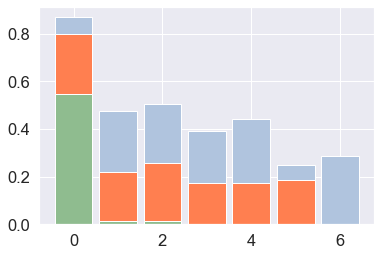

In [215]:
# plot
barWidth = 0.85
names = ('1','2','3','4','5','6','7')
# Create 1/green Bars
plt.bar(r, [bar[0] for bar in response_bars], color='darkseagreen', edgecolor='white', width=barWidth)
# Create 2/orange Bars
plt.bar(r, [bar[1] for bar in response_bars], bottom=response_bars_horizontal[0], color='coral', edgecolor='white', width=barWidth)
# Create 3/blue Bars
plt.bar(r, [bar[2] for bar in response_bars], bottom=[i+j for i,j in zip(response_bars_horizontal[0], response_bars_horizontal[1])], color='lightsteelblue', edgecolor='white', width=barWidth)
# Create 4th response Bars
plt.bar(r, [bar[3] for bar in response_bars], bottom=[i+j+k for i,j,k in zip(response_bars_horizontal[0], response_bars_horizontal[1],response_bars_horizontal[2])], color='gold', edgecolor='white', width=barWidth)
# Create 5th response Bars
plt.bar(r, [bar[4] for bar in response_bars], bottom=[i+j+k+l for i,j,k,l in zip(response_bars[0], response_bars_horizontal[1], response_bars_horizontal[2], response_bars_horizontal[3])], color='indigo', edgecolor='white', width=barWidth)
# Create 6th response Bars
plt.bar(r, [bar[5] for bar in response_bars], bottom=[i+j+k+l+m for i,j,k,l,m in zip(response_bars[0], response_bars_horizontal[1], response_bars_horizontal[2], response_bars_horizontal[3], response_bars_horizontal[4])], color='teal', edgecolor='white', width=barWidth)
# Create 7th response Bars
plt.bar(r, [bar[6] for bar in response_bars], bottom=[i+j+k+l+m+n for i,j,k,l,m,n in zip(response_bars_horizontal[0], response_bars_horizontal[1], response_bars_horizontal[2], response_bars_horizontal[3], response_bars_horizontal[4], response_bars_horizontal[5])], color='peachpuff', edgecolor='white', width=barWidth)
# Custom x axis
plt.xticks(r, names)
plt.xlabel("State Response Number")
# Show graphic
plt.show()